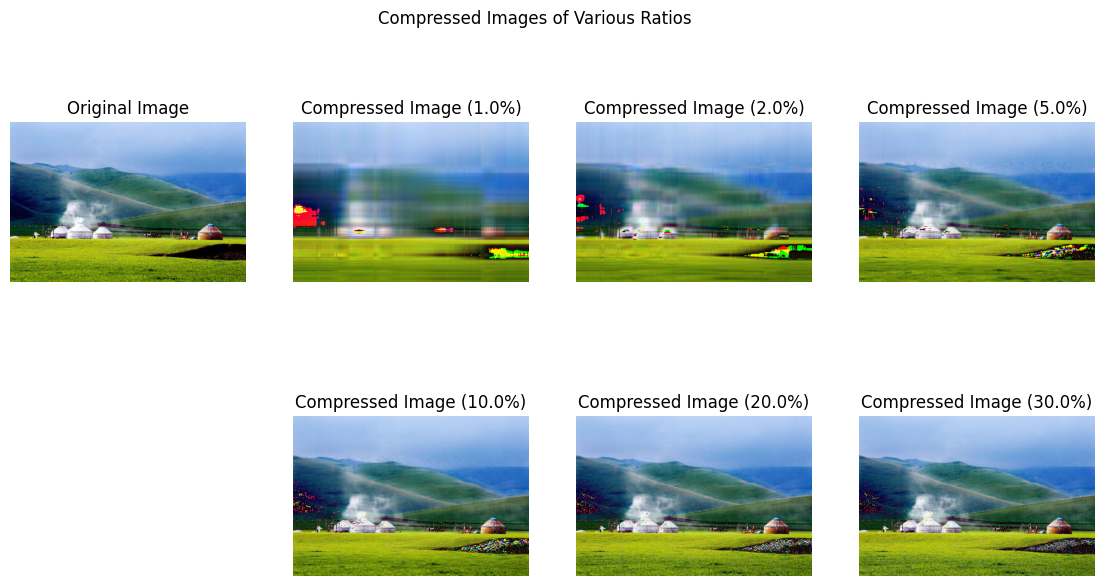

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 读取彩色图像
image = Image.open("压缩图片.png")
image_array = np.array(image)

# 分离RGB通道
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# 进行SVD分解并压缩
def compress_channel(channel, compression_ratio):
    U, S, Vt = np.linalg.svd(channel, full_matrices=False)
    k = int(compression_ratio * min(channel.shape))
    compressed_channel = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    return compressed_channel

# 选择保留的奇异值数量（压缩率）
compression_ratios = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3]

plt.figure(figsize=(14, 7))

# 原始彩色图像
plt.subplot(2, 4, 1)
plt.imshow(image_array)
plt.title('Original Image')
plt.axis('off')

i = 2
for ratio in compression_ratios:
    compressed_red = compress_channel(red_channel, ratio)
    compressed_green = compress_channel(green_channel, ratio)
    compressed_blue = compress_channel(blue_channel, ratio)

    compressed_image = np.stack((compressed_red, compressed_green, compressed_blue), axis=-1)

    if i<5:
        plt.subplot(2, 4, i)
    else:
        plt.subplot(2,4,i+1)
    plt.imshow(compressed_image.astype(np.uint8))
    plt.title(f'Compressed Image ({ratio*100}%)')
    plt.axis('off')
    i += 1

plt.suptitle('Compressed Images of Various Ratios')
plt.show()